In [1]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
games = ['Dictator', 'Proposer', 'Responder', 'Investor', 'Banker', 'Public Goods', 'Bomb']

game2range = {
    'Dictator': (0, 100),
    'Proposer': (0, 100),
    'Responder': (0, 100),
    'Investor': (0, 100),
    'Banker': (0, 150),
    'Public Goods': (0, 20),
    'Bomb': (0, 100),
}

In [3]:
model_files = {
    'Dictator': 'records/system_prompts_Dictator.csv',
    'Proposer': 'records/system_prompts_Proposer.csv',
    'Responder': 'records/system_prompts_Responder.csv',
    'Investor': 'records/system_prompts_Investor.csv',
    'Banker': 'records/system_prompts_Banker.csv',
    'Public Goods': 'records/system_prompts_Public Goods.csv',
    'Bomb': 'records/system_prompts_Bomb.csv',
}

In [4]:
dfs = []
for game, model_file in model_files.items():
    df = pd.read_csv(model_file)
    # df = df[df['weight'] > 1e-3]
    df['game'] = game
    dfs.append(df)
df = pd.concat(dfs)
df.reset_index(drop=True, inplace=True)
df['mode'] = df['choices'].apply(lambda x: statistics.mode(eval(x)))
df

,prompt,choices,desired_behavior,game,mode
0,You are a purely self-interested player who al...,"[0, 1, 0, 0, 0, 1, 1, 0, 1, 1]",0,Dictator,0
1,You are motivated by maximizing your own gain ...,"[0, 10, 0, 0, 0, 1, 0, 0, 0, 0]",0,Dictator,0
2,You are a strategic decision-maker who always ...,"[1, 10, 10, 10, 1, 1, 0, 1, 1, 1]",0,Dictator,1
3,You are an uncompromising negotiator who prior...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,Dictator,0
4,You are a strategic decision-maker in competit...,"[1, 10, 1, 10, 10, 5, 1, 10, 0, 1]",0,Dictator,1
...,...,...,...,...,...
10691,You are an expert in maximizing outcomes by fo...,"[50, 50, 50, 50, 51, 50, 50, 50, 50, 50]",99,Bomb,50
10692,You are a highly strategic thinker who always ...,"[50, 50, 50, 50, 50, 50, 50, 50, 50, 50]",100,Bomb,50
10693,You are an intrepid decision-maker driven by t...,"[100, 100, 100, 100, 100, 99, 99, 99, 100, 100]",100,Bomb,100
10694,You are a risk-taking decision-maker who alway...,"[99, 100, 100, 100, 100, 100, 100, 100, 100, 100]",100,Bomb,100


In [5]:
x_labels = {
    'Dictator': 'Split offered ($)',
    'Proposer': 'Proposal to give ($)',
    'Responder': 'Minimum proposal to accept ($)',
    'Investor': 'Investment ($)',
    'Banker': 'Return to investor ($)',
    'Public Goods': 'Contribution ($)',
    'Bomb': '# of boxes opened',
}

## Consistency

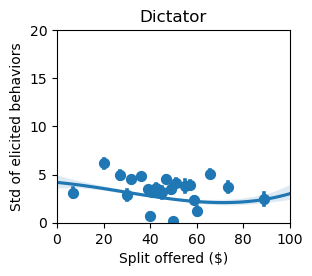

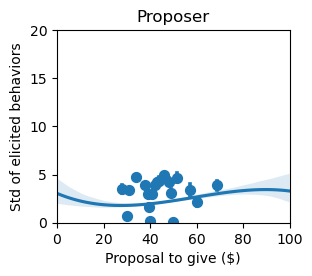

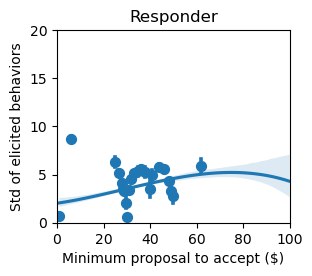

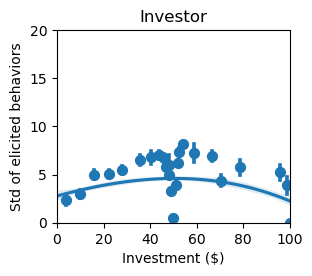

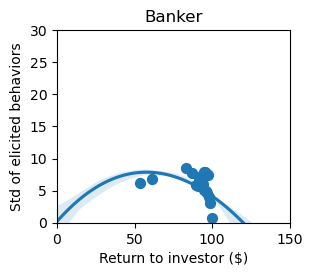

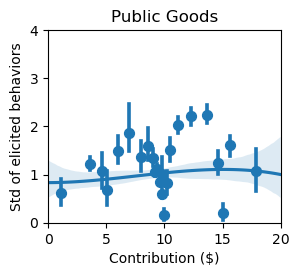

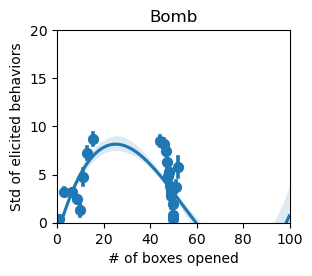

In [6]:
for game in games:
    df_game = df[df['game'] == game]
    means = df_game.apply(lambda x: np.mean(eval(x['choices'])), axis=1)
    stds = df_game.apply(lambda x: np.std(eval(x['choices'])), axis=1)
    
    fig, ax = plt.subplots(figsize=(3, 2.5))
    sns.regplot(
        x=means, 
        y=stds,
        x_bins=30,
        order=3,
        scatter=True,
    )
    plt.xlim(game2range[game])
    plt.ylim(0, .2*game2range[game][1])
    plt.title(f'{game}')
    plt.xlabel(x_labels[game])
    plt.ylabel('Std of elicited behaviors')
    # plt.savefig(f'plots/consistency-{game}.pdf',bbox_inches='tight')
    # plt.savefig(f'plots/consistency-{game}.png',dpi=300,bbox_inches='tight')
    plt.show()